## Analysis

Imports and initialization

In [127]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [128]:
PATH = 'animal_game/analyses/21_08_20'

In [129]:
data = pd.read_csv(f'{PATH}/processed.tsv.gz', 
                   sep='\t', compression='gzip')
aggs = pd.read_csv(f'{PATH}/aggregates.tsv', sep='\t')

#### Structure
- Fluency:
    - Diversity can yield collective gain in fluency
    - Fluency of pairs across diversity levels
    - Plot showing that high noise-level individuals just get stuck all the time (distribution)
    - Appendix: control analysis - depends on difference in individual performance
- Flexibility:
    - Diversity also yields collective gain in flexibility (jump size)
    - Flexibility relates to performance
    - Probably because it makes it possible to visit peripheries
           - Isolatedness? Dispersity? Remoteness?
- Originality:
    - Diversity leads to more original behavior
    - This too may be related to performance

#### A bit of postprocessing

In [130]:
data.rename({'noise_level_a0': 'diversity_level'}, axis=1, inplace=True)
aggs.rename({'noise_level_a0': 'diversity_level'}, axis=1, inplace=True)

In [132]:
all_data = data.copy()
all_aggs = aggs.copy()
aggs = aggs[aggs['diversity_level']<=14]
data = data[data['diversity_level']<=14]

In [349]:
data['diversity_dodge'] = data['diversity_level'] + \
                          np.random.uniform(-.2,.2,size=data.shape[0])
aggs['diversity_dodge'] = aggs['diversity_level'] + \
                          np.random.uniform(-.2,.2,size=aggs.shape[0])

## Fluency/performance analysis

First, let's investigate whether there is any collective benefit in fluency due to interaction, and how that depends on noise levels.

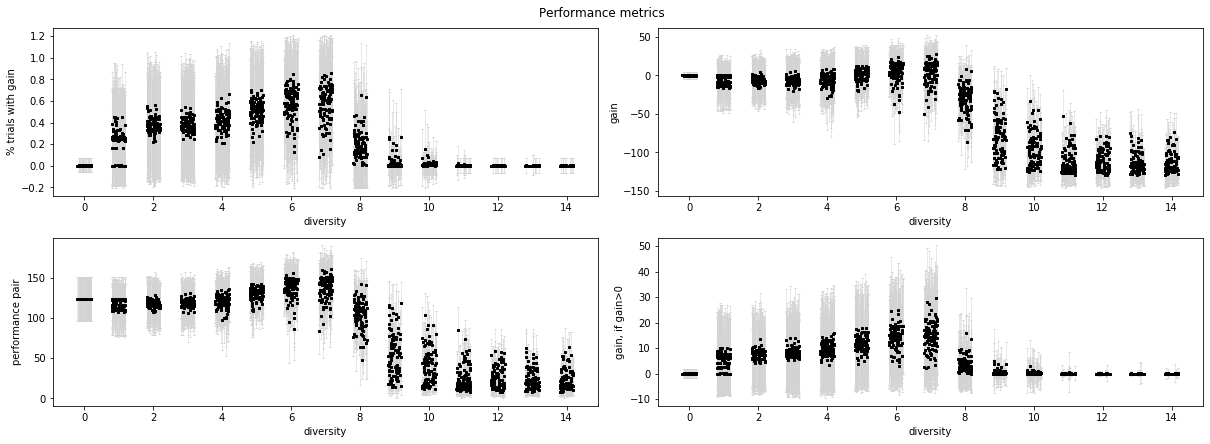

In [351]:
f, ax = plt.subplots(figsize=(17,6), nrows=2, ncols=2)
ax[0,0].errorbar(data=aggs,
                 x='diversity_dodge', 
                 y='is_gain_mean',
                 yerr='is_gain_std',
                 marker="s",
                 fmt='.k',
                 ecolor='lightgrey', 
                 elinewidth=.5, capsize=1, 
                 ms=2)
ax[0,0].set_xlabel('diversity')
ax[0,0].set_ylabel('% trials with gain')
ax[0,1].errorbar(data=aggs,
               x='diversity_dodge', 
               y='amount_gain_mean',
               yerr='amount_gain_std',
               marker="s",
               fmt='.k',
               ecolor='lightgrey', 
               elinewidth=.5, capsize=1, 
               ms=2)
ax[0,1].set_xlabel('diversity')
ax[0,1].set_ylabel('gain')
ax[1,0].errorbar(data=aggs,
               x='diversity_dodge', 
               y='performance_pair_mean',
               yerr='performance_pair_std',
               marker="s",
               fmt='.k',
               ecolor='lightgrey', 
               elinewidth=.5, capsize=1, 
               ms=2)
ax[1,0].set_xlabel('diversity')
ax[1,0].set_ylabel('performance pair')
ax[1,1].errorbar(data=aggs,
                 x='diversity_dodge', 
                 y='pos_gain_mean',
                 yerr='pos_gain_std',
                 marker="s",
                 fmt='.k',
                 ecolor='lightgrey', 
                 elinewidth=.5, capsize=1, 
                 ms=2)
ax[1,1].set_xlabel('diversity')
ax[1,1].set_ylabel('gain, if gain>0')
plt.suptitle('Performance metrics', y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

The plot below shows the distribution of trial-level performances by noise level.

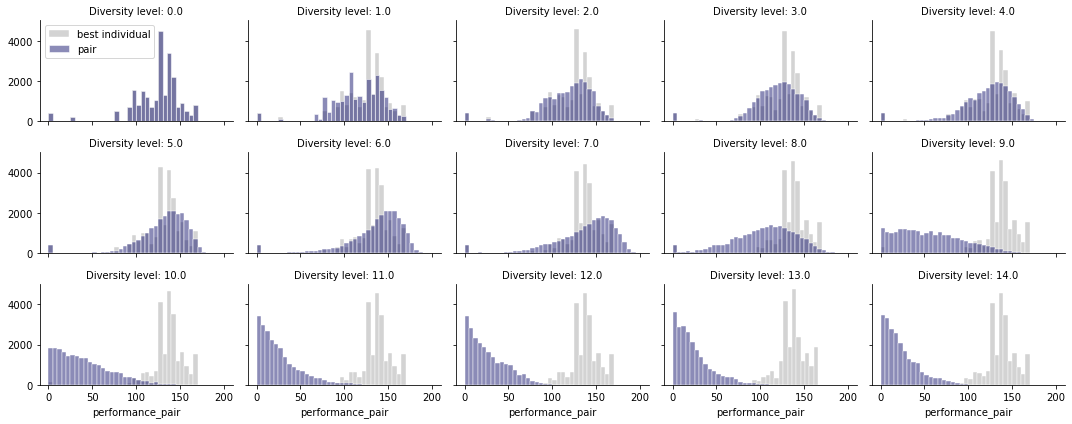

In [280]:
f = sns.FacetGrid(data=data, 
                  col='diversity_level', 
                  col_wrap=5,
                  height=2, 
                  aspect=1.5)
f.map(sns.histplot, 'performance_best', alpha=.5, 
      binwidth=5, edgecolor='white', color='darkgrey',
      label='best individual')
f.map(sns.histplot, 'performance_pair', alpha=.5, 
      color='midnightblue', 
      binwidth=5, edgecolor='white', 
      label='pair')
f.set_titles("Diversity level: {col_name}")
f.axes[0].legend()
plt.show()

### Fluency, control analysis: performance difference

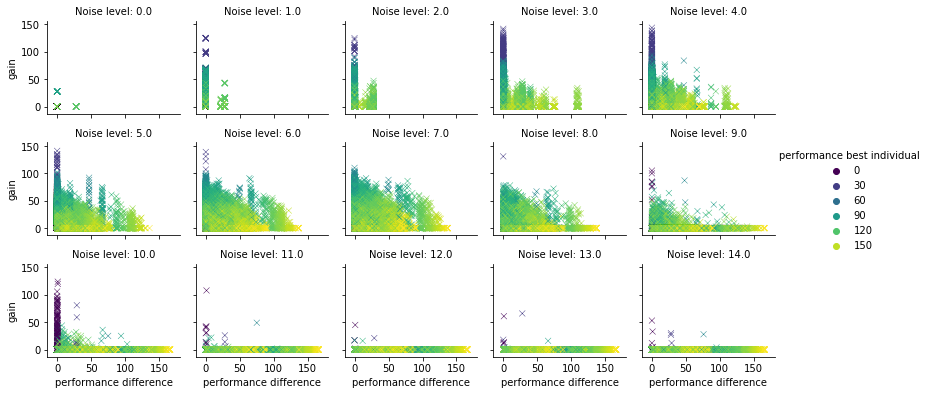

In [304]:
f = sns.relplot(data=data,
                x='performance_difference_individuals', 
                y='pos_gain',
                col='diversity_level', 
                col_wrap=5, 
                height=1.8, aspect=1.2, 
                marker='x', 
                color='grey', 
                hue='performance_best', 
                palette='viridis')
f.set_axis_labels('performance difference', 'gain')
f.set_titles('Noise level: {col_name}')
f._legend.set_title('performance best individual')
f._legend.set_bbox_to_anchor([1.06, 0.5]) 
plt.show()

### Fluency, control analysis: collective inhibition

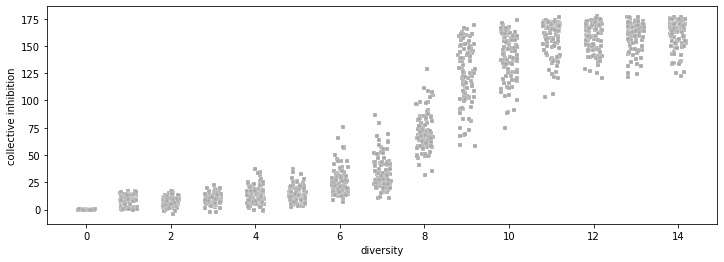

In [402]:
f, ax = plt.subplots(figsize=(12,4))
sns.scatterplot(data=aggs,
                 x='diversity_dodge', 
                 y='collective_inhibition',
                 marker="s", 
                color='darkgrey',
                 s=10)
plt.xlabel('diversity')
plt.ylabel('collective inhibition')
plt.show()

## Flexibility

Relationship between jumps and performance across noise levels, pair-level estimates.

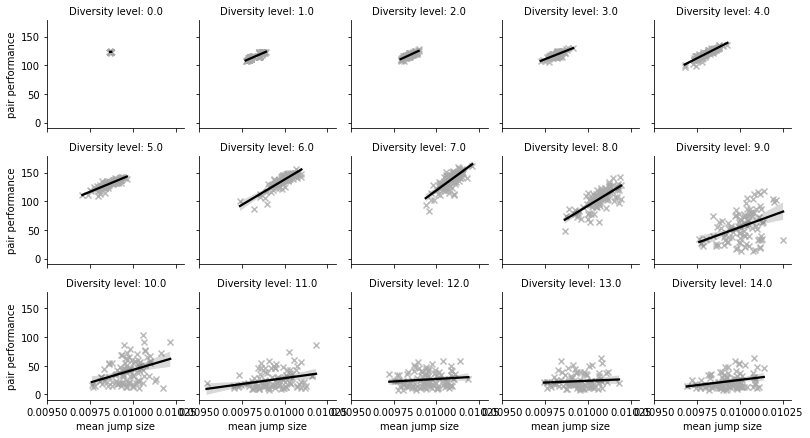

In [309]:
f = sns.lmplot(data=aggs,
               col='diversity_level', 
               x='mean_jump_speaker',
               y='performance_pair_mean',  
               col_wrap=5, 
               height=2,
               aspect=1.1, 
               markers='x',
               scatter_kws={'color': 'darkgrey'},
               line_kws={'color': 'black'})
f.set_titles("Diversity level: {col_name}")
f.set_xlabels("mean jump size")
f.set_ylabels("pair performance")
for a in f.axes:
    a.set_xlim(0.0095,0.0103)
    a.set_xlabel
plt.show()

Relationship between jumps, performance and neighborhood density.

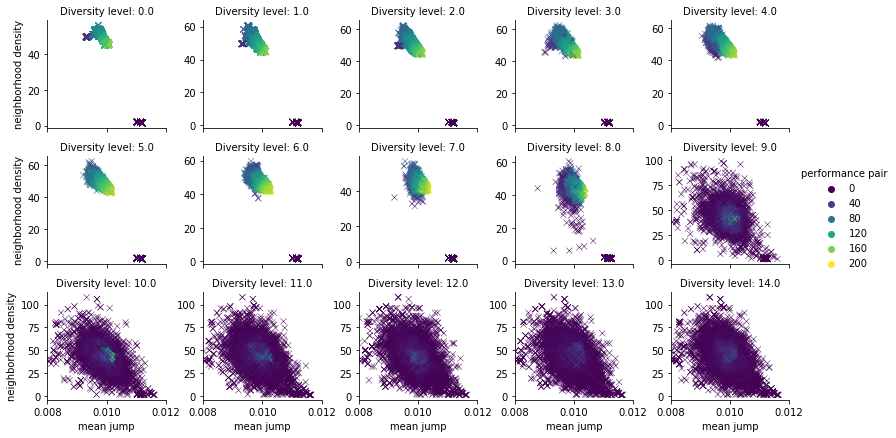

In [307]:
f = sns.relplot(data=data,
                col='diversity_level', 
                x='mean_jump_speaker',
                y='mean_neighborhood_density_0', 
                hue='performance_pair',
                palette='viridis',
                col_wrap=5, 
                height=2,
                aspect=1.1, 
                marker='x',
                color='darkgrey', 
                facet_kws={'sharey': False})
f.set_titles("Diversity level: {col_name}")
f.set_xlabels("mean jump")
f.set_ylabels("neighborhood density")
f._legend.set_title('performance pair')
for a in f.axes:
    a.set_xlim(0.008, 0.012)
plt.show()

## Originality

Originality, diversity and performance

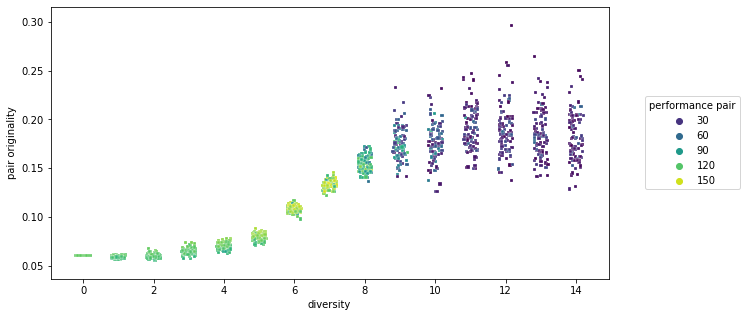

In [403]:
f, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=aggs,
                 x='diversity_dodge', 
                 y='orig_pair',
                 marker="s",
                 hue='performance_pair_mean',
                 palette='viridis',
                 s=10)
plt.xlabel('diversity')
plt.ylabel('pair originality')
plt.legend(title='performance pair', bbox_to_anchor=[1.15,.5], loc='center')
plt.show()

Difference in originality and likelihood of gain

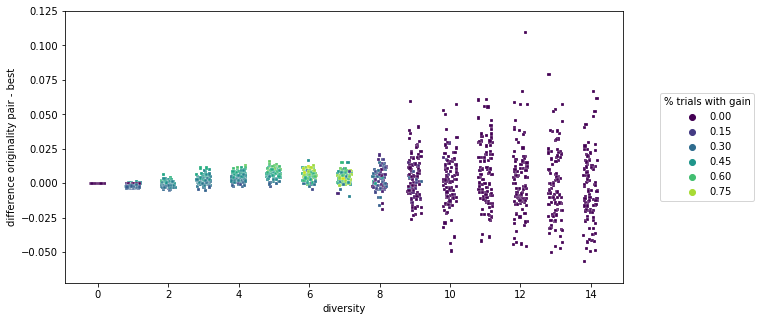

In [404]:
f, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=aggs,
                x='diversity_dodge', 
                y='orig_best_difference',
                marker="s",
                hue='is_gain_mean',
                palette='viridis',
                s=10)
plt.xlabel('diversity')
plt.ylabel('difference originality pair - best')
plt.legend(title='% trials with gain', bbox_to_anchor=[1.15,.5], loc='center') 
plt.show()

## Supplementary analyses

### Plot jump distribution for trials where there is gain

/home/roberta/venvs/dl_test/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/roberta/venvs/dl_test/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/roberta/venvs/dl_test/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/roberta/venvs/dl_test/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/roberta/venvs/dl_test/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/roberta/venvs/dl_test/lib/python3.8/site-packages/seaborn/distributions.py

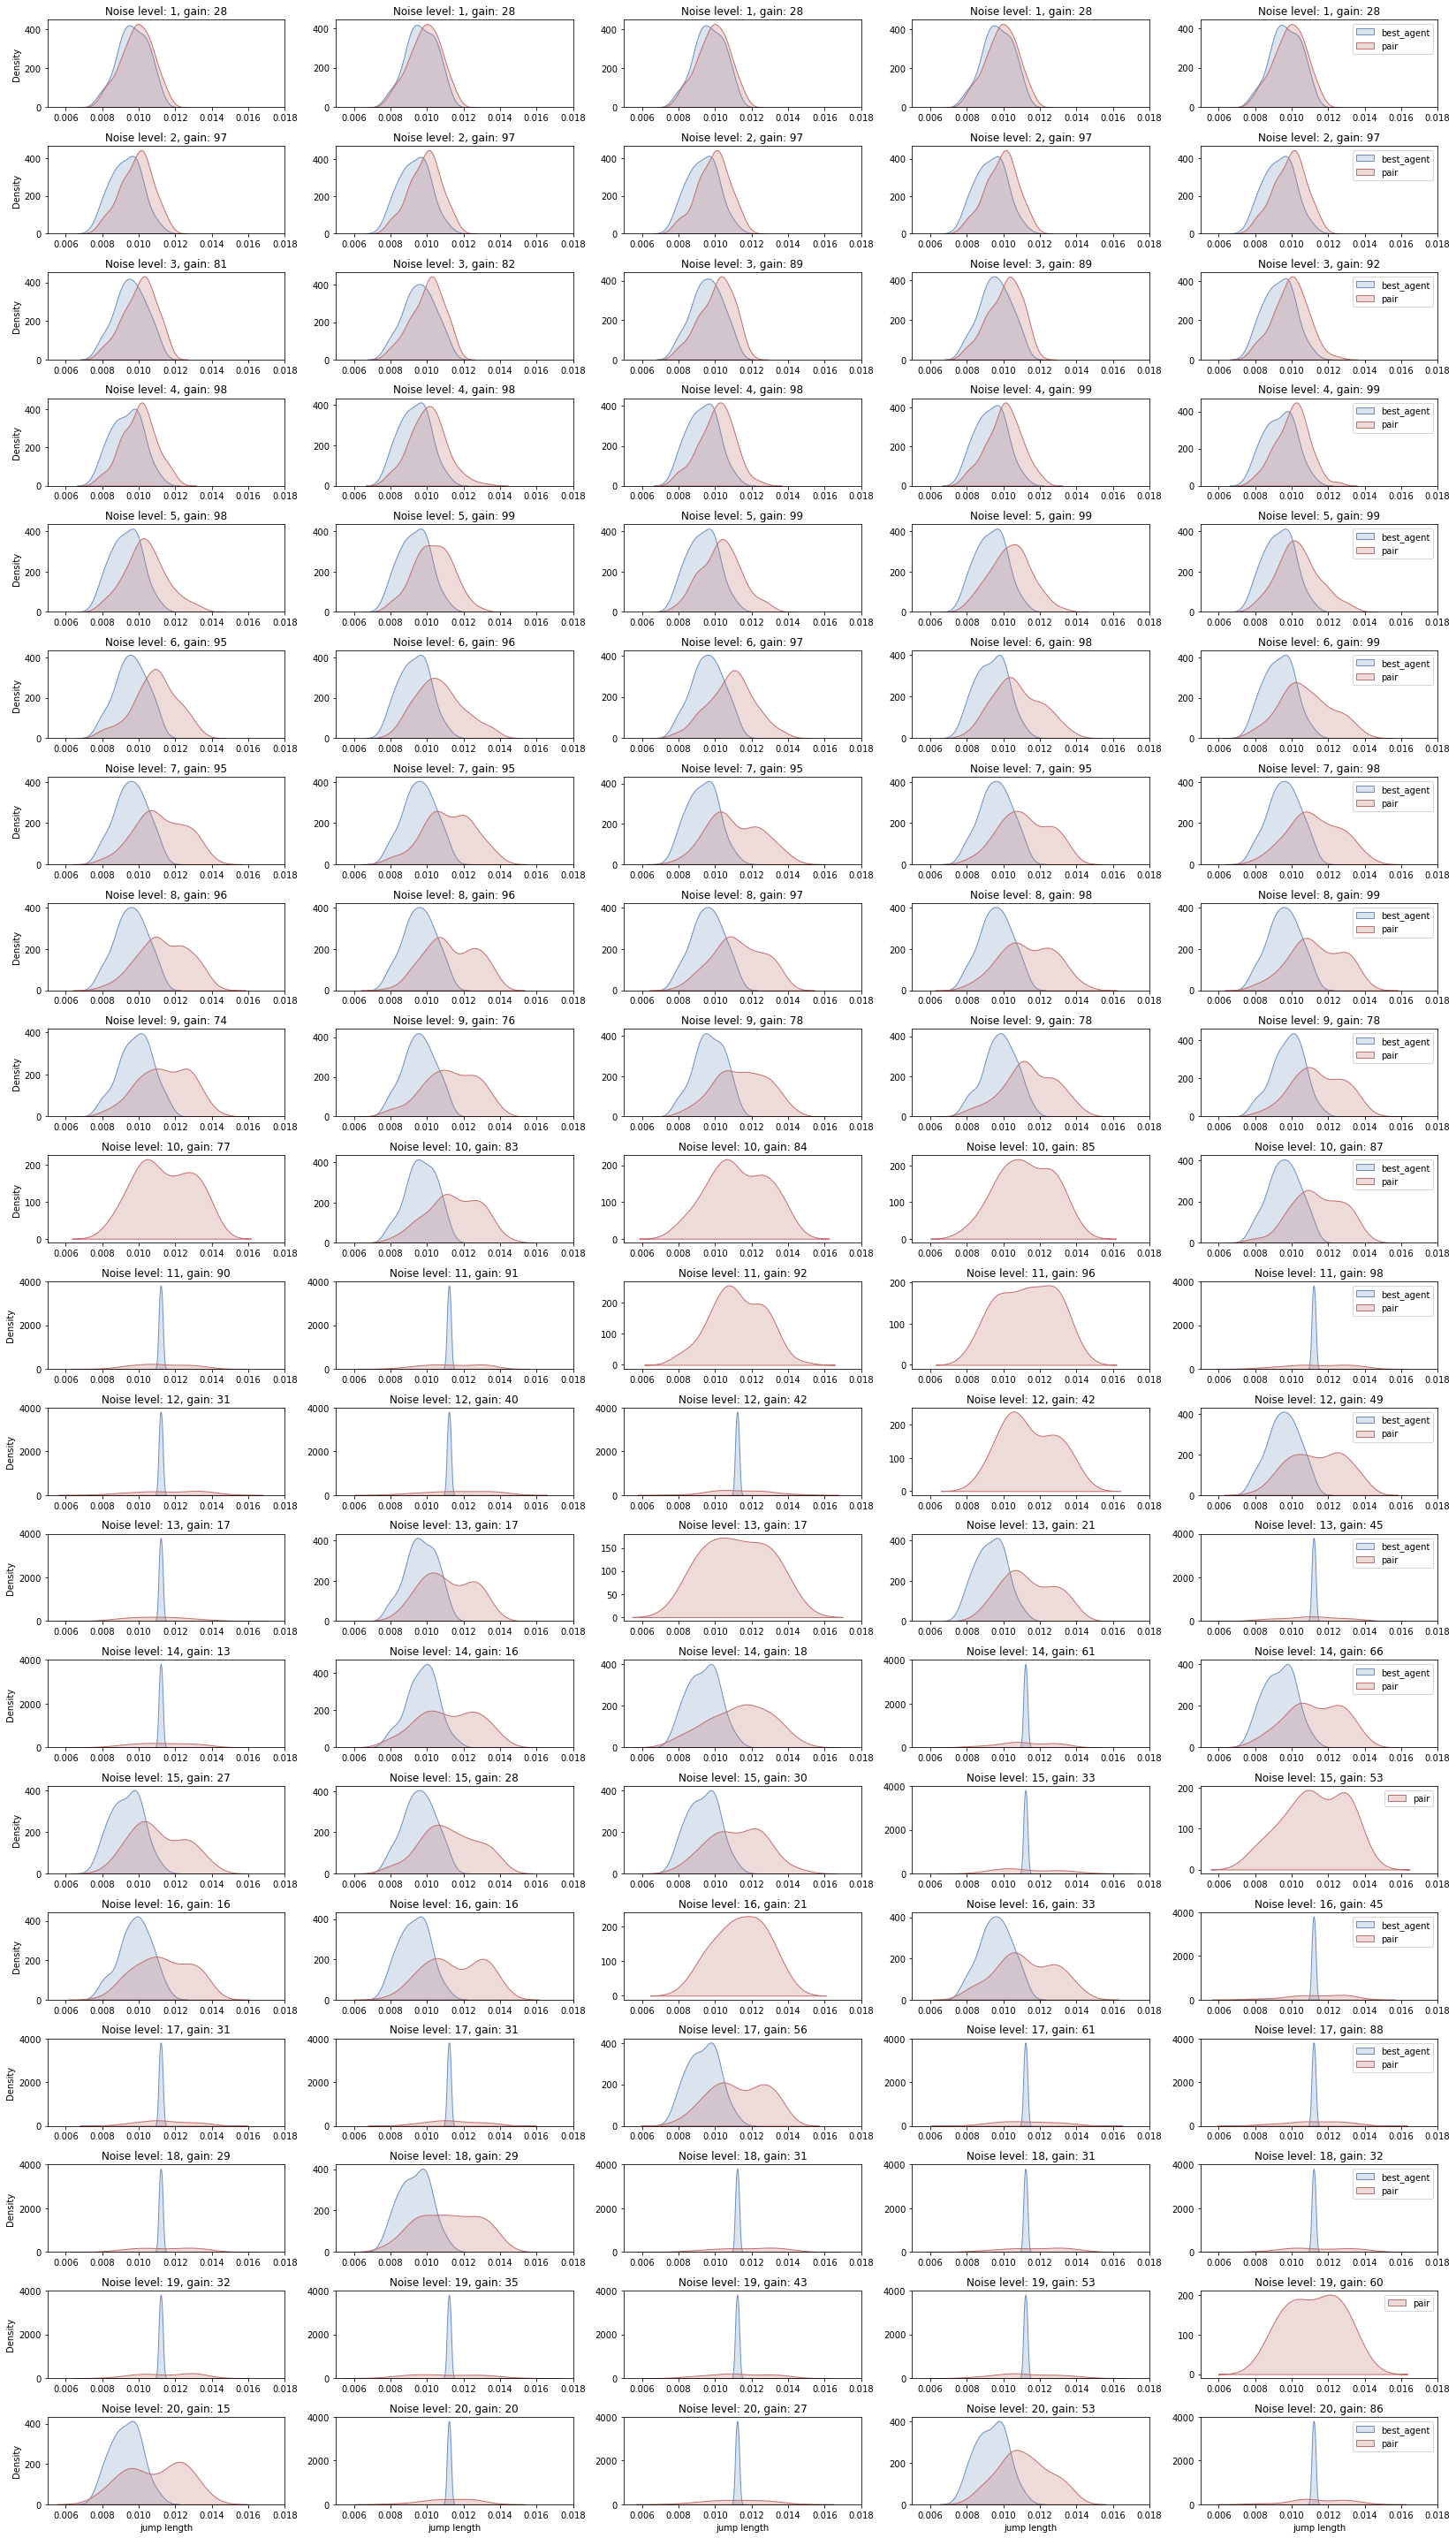

In [617]:
fig, ax = plt.subplots(nrows=20, ncols=5, figsize=(23,40))
for bidx, b in enumerate(sorted(data['noise_level_recoded'].unique().tolist())):
    data_sub = data[(data['noise_level_recoded']==b) & (data['amount_gain']<100) \
                     & (pair_aggs['amount_gain']>-100)]
    bests = data_sub[['pair', 'amount_gain', 'best_agent', 'init_seed']].sort_values('amount_gain').tail(n=5)
    pairs_best = bests.pair.tolist()
    pairs_best_agent = bests.best_agent.tolist()
    pairs_best_seed = bests.init_seed.tolist()
    pairs_best_gain = bests.amount_gain.tolist()
    pbs = list(zip(pairs_best, pairs_best_agent, pairs_best_seed, pairs_best_gain))
    for idx, p in enumerate(pbs):
        pair = p[0]+'_2_0.01179.txt'
        agent = p[1]+'_1_0.01179.txt'
        seed = p[2]
        idf = pd.read_csv(f'{log_path}/{date}/individual/{agent}')
        sns.kdeplot(x=idf[idf['init_seed']==seed].prob0, 
                     color=sns.color_palette('vlag')[0], 
                     label='best_agent', 
                     ax=ax[(bidx, idx)], 
                    fill=True)
        pdf = pd.read_csv(f'{log_path}/{date}/pairs/{pair}')
        sns.kdeplot(x=pdf[pdf['init_seed']==seed].prob0, 
                     color=sns.color_palette('vlag')[-1], 
                     label='pair', 
                     ax=ax[(bidx, idx)],
                    fill=True)
        ax[(bidx, idx)].set_title(f'Noise level: {b}, gain: {p[3]}')
        if idx != 0:
            ax[(bidx, idx)].set_ylabel('')
        if idx == 4:
            ax[(bidx, idx)].legend(loc='upper right')
        if bidx != 19:
            ax[(bidx, idx)].set_xlabel('')
        else:
            ax[(bidx, idx)].set_xlabel('jump length')
        ax[(bidx, idx)].set_xlim(0.005, 0.018)
plt.tight_layout()
plt.show()

### Visualize some examples

In [642]:
for bidx, b in enumerate(sorted(pair_aggs['noise_level_recoded'].unique().tolist())):
    data = pair_aggs[pair_aggs['noise_level_recoded']==b]
    print(f'\033[1m\033[34mNoise level: {b}\033[0m')
    sampled = data.sample(n=3, random_state=0)
    pairs_best = sampled.pair.tolist()
    pairs_best_agent = sampled.best_agent.tolist()
    pairs_best_seed = sampled.init_seed.tolist()
    pairs_best_gain = sampled.amount_gain.tolist()
    pbs = list(zip(pairs_best, pairs_best_agent, pairs_best_seed, pairs_best_gain))
    for idx, p in enumerate(pbs):
        pair = p[0]+'_2_0.01179.txt'
        agent = p[1]+'_1_0.01179.txt'
        seed = p[2]
        idf = pd.read_csv(f'{log_path}/{date}/individual/{agent}')
        ilist = idf[idf['init_seed']==seed].response.tolist()
        pdf = pd.read_csv(f'{log_path}/{date}/pairs/{pair}')
        plist = pdf[pdf['init_seed']==seed].response.tolist()
        print('\033[1mIndividual\033[0m: ' + f'\033[1m\033[31m{seed}\033[0m, ' + ', '.join(ilist[:20]))
        print('\033[1mPair\033[0m: ' + f'\033[1m\033[31m{seed}\033[0m, ' + ', '.join(plist[:20]) + '\n')

Noise level: 1
Individual: goat, cow, pig, chicken, duck, goose, pheasant, deer, elk, antelope, bison, black_bear, grizzly_bear, polar_bear, killer_whale, sperm_whale, blue_whale, fin_whale, whale, dolphin, shark
Pair: goat, cow, pig, chicken, duck, goose, pheasant, deer, elk, antelope, bison, black_bear, grizzly_bear, polar_bear, killer_whale, sperm_whale, blue_whale, fin_whale, whale, dolphin, shark

Individual: grasshopper, beetle, cockroach, harvestman, millipede, saurian, anteater, armadillo, alligator, crocodile, shark, dolphin, whale, blue_whale, sperm_whale, fin_whale, killer_whale, polar_bear, grizzly_bear, black_bear, tapir
Pair: grasshopper, beetle, cockroach, harvestman, millipede, saurian, anteater, armadillo, alligator, crocodile, shark, dolphin, whale, blue_whale, sperm_whale, fin_whale, killer_whale, polar_bear, grizzly_bear, black_bear, tapir

Individual: mongoose, gerbil, sea_snake, coral_snake, diamondback_rattlesnake, cottonmouth, copperhead, rattlesnake, snake, liz

### Print sample sequences where pairs do better

In [670]:
for bidx, b in enumerate(sorted(pair_aggs['noise_level_recoded'].unique().tolist())):
    data = pair_aggs[pair_aggs['noise_level_recoded']==b]
    print(f'\033[1m\033[34mNoise level: {b}\033[0m')
    sampled = data[data['amount_gain']>0].sample(2).sort_values('amount_gain')
    pairs_best = sampled.pair.tolist()
    pairs_best_agent = sampled.best_agent.tolist()
    pairs_best_seed = sampled.init_seed.tolist()
    pairs_best_gain = sampled.amount_gain.tolist()
    pbs = list(zip(pairs_best, pairs_best_agent, pairs_best_seed, pairs_best_gain))
    for idx, p in enumerate(pbs):
        print(f'\033[1mAmount gain: {p[3]}\033[0m')
        pair = p[0]+'_2_0.01179.txt'
        agent = p[1]+'_1_0.01179.txt'
        seed = p[2]
        idf = pd.read_csv(f'{log_path}/{date}/individual/{agent}')
        ilist = idf[idf['init_seed']==seed].response.tolist()
        pdf = pd.read_csv(f'{log_path}/{date}/pairs/{pair}')
        plist = pdf[pdf['init_seed']==seed].response.tolist()
        print('\033[1mIndividual\033[0m: ' + f'\033[1m\033[31m{seed}\033[0m, ' + ', '.join(ilist))
        print('\033[1mPair\033[0m: ' + f'\033[1m\033[31m{seed}\033[0m, ' + ', '.join(plist) + '\n')

Noise level: 1
Amount gain: 28
Individual: blue_whale, sperm_whale, killer_whale, fin_whale, whale, dolphin, shark, squid, cuttlefish, sawfish, sea_snake, coral_snake, diamondback_rattlesnake, cottonmouth, copperhead, rattlesnake, snake, lizard, toad, frog, salamander, turtle, tortoise, elephant, rhinoceros, giraffe, baboon, hyena, polecat, weasel, rabbit, dog, cat, poodle, dachshund, pekingese, hamster, guinea_pig, chimpanzee, bonobo, okapi, gazelle, leopard, tiger, lion, eagle, hawk, sparrow, parrot, parakeet, pheasant, deer, elk, antelope, bison, black_bear, grizzly_bear, polar_bear, red_panda, bengal_tiger, gorilla, monkey, rat, mouse, squirrel, porcupine, owl, wolf, coyote, beaver, otter, trout, salmon, halibut, plaice, lobster, crab, prawn, shrimp, oyster, scallop, shell, snail, slug, starfish, jellyfish, octopus, anteater, armadillo, alligator, crocodile, platypus, koala, wombat, dingo, kangaroo, kiwi
Pair: blue_whale, sperm_whale, fin_whale, whale, dolphin, killer_whale, polar_

### Print sample sequences where pairs do worse

In [672]:
for bidx, b in enumerate(sorted(pair_aggs['noise_level_recoded'].unique().tolist())):
    data = pair_aggs[pair_aggs['noise_level_recoded']==b]
    print(f'\033[1m\033[34mNoise level: {b}\033[0m')
    sampled = data[data['amount_gain']<0].sample(2).sort_values('amount_gain')
    pairs_best = sampled.pair.tolist()
    pairs_best_agent = sampled.best_agent.tolist()
    pairs_best_seed = sampled.init_seed.tolist()
    pairs_best_gain = sampled.amount_gain.tolist()
    pbs = list(zip(pairs_best, pairs_best_agent, pairs_best_seed, pairs_best_gain))
    for idx, p in enumerate(pbs):
        print(f'\033[1mAmount gain\033[0m: {p[3]}')
        pair = p[0]+'_2_0.01179.txt'
        agent = p[1]+'_1_0.01179.txt'
        seed = p[2]
        idf = pd.read_csv(f'{log_path}/{date}/individual/{agent}')
        idf = idf[idf['init_seed']==seed]
        ilist = idf.response.tolist()
        ilast = idf.ndens0.tolist()[-1]
        pdf = pd.read_csv(f'{log_path}/{date}/pairs/{pair}')
        pdf = pdf[pdf['init_seed']==seed]
        plist = pdf.response.tolist()
        print('\033[1mIndividual\033[0m: ' + f'\033[1m\033[31m{seed}\033[0m, ' + ', '.join(ilist))
        print('\033[1mPair\033[0m: ' + f'\033[1m\033[31m{seed}\033[0m, ' + ', '.join(plist) + '\n')

Noise level: 1
Amount gain: -56
Individual: armadillo, anteater, harvestman, millipede, saurian, sea_cow, blue_whale, sperm_whale, killer_whale, fin_whale, whale, dolphin, shark, squid, cuttlefish, sawfish, sea_snake, coral_snake, diamondback_rattlesnake, cottonmouth, copperhead, rattlesnake, snake, lizard, toad, frog, salamander, turtle, tortoise, elephant, rhinoceros, giraffe, baboon, hyena, polecat, weasel, rabbit, dog, cat, poodle, dachshund, pekingese, hamster, guinea_pig, chimpanzee, bonobo, okapi, gazelle, leopard, tiger, lion, eagle, hawk, sparrow, parrot, parakeet, pheasant, deer, elk, antelope, bison, black_bear, grizzly_bear, polar_bear, red_panda, bengal_tiger, gorilla, monkey, rat, mouse, squirrel, porcupine, owl, wolf, coyote, beaver, otter, trout, salmon, halibut, plaice, lobster, crab, prawn, shrimp, oyster, scallop, shell, snail, slug, starfish, jellyfish, octopus, spider, tarantula, scorpion, panther, piranha, crocodile, alligator, eel, catfish, carp, perch, barbel, c

Bottom line: diversity can help avoiding local minima in the space. However, it can occasionally contribute to speeding up convergence towards those local minima (something that is not a local minimum for an agent, which names is, may be so for others).

### Plot some individual trial

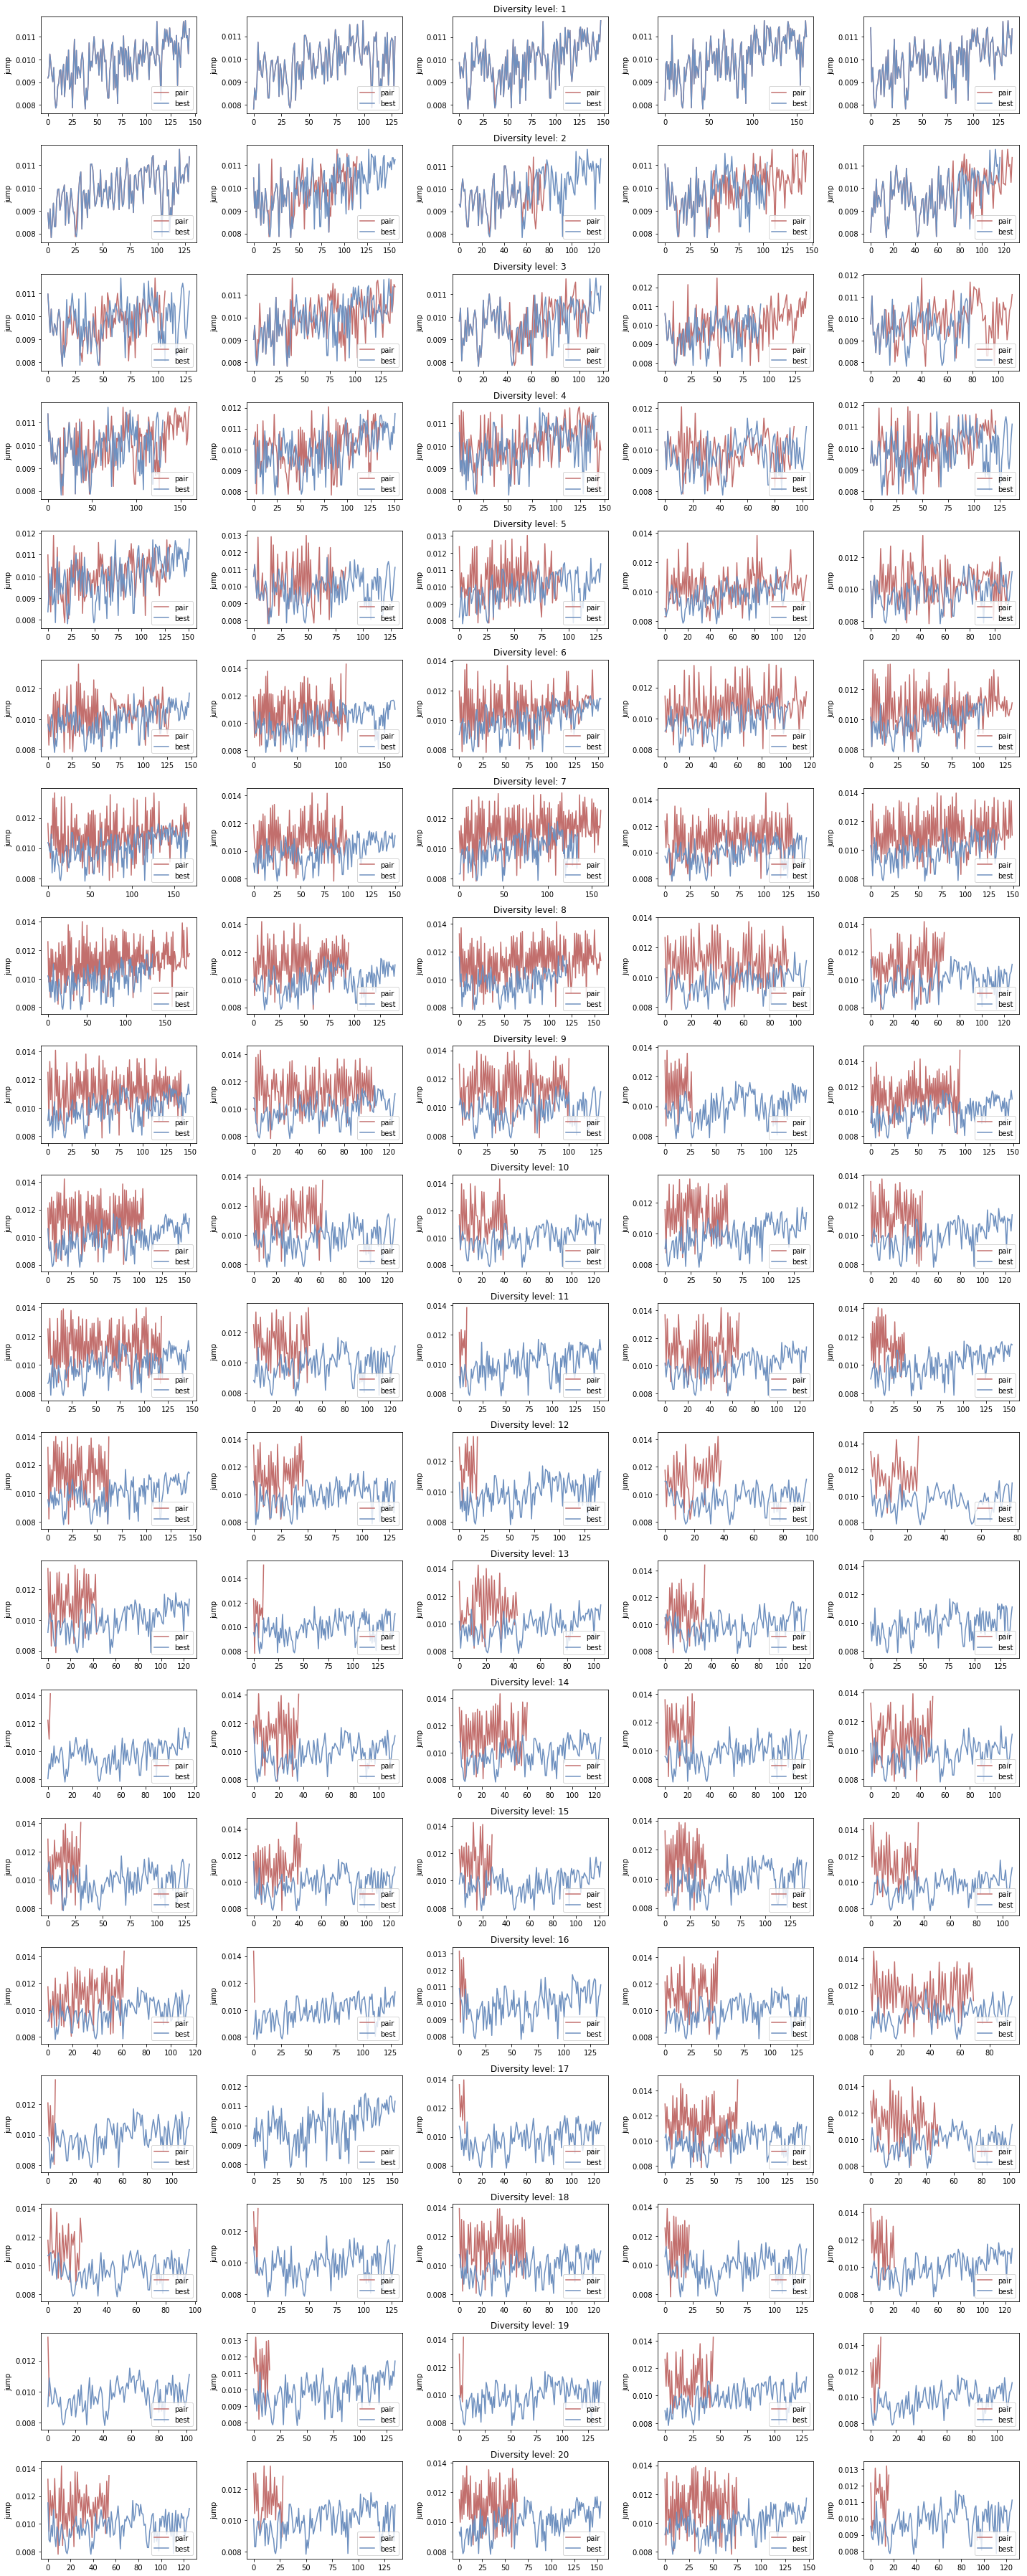

In [192]:
fig, ax = plt.subplots(nrows=20, ncols=5, figsize=(20,50))
for bidx, b in enumerate(sorted(pair_aggs['noise_level_recoded'].unique().tolist())):
    data = pair_aggs[(pair_aggs['noise_level_recoded']==b) & (pair_aggs['amount_gain']<100) \
                     & (pair_aggs['amount_gain']>-100)]
    bests = data[['pair', 'amount_gain', 'best_agent', 'init_seed']].sample(n=5).sort_values('amount_gain')
    pairs_best = bests.pair.tolist()
    pairs_best_agent = bests.best_agent.tolist()
    pairs_best_seed = bests.init_seed.tolist()
    pairs_best_gain = bests.amount_gain.tolist()
    pbs = list(zip(pairs_best, pairs_best_agent, pairs_best_seed, pairs_best_gain))
    for idx, p in enumerate(pbs):
        pair = p[0]+'_2_0.01179.txt'
        agent = p[1]+'_1_0.01179.txt'
        seed = p[2]
        if p[1] == pair_aggs['agent_0'].iloc[0]:
            pbs = 'prob0'
        else:
            pbs = 'prob1'
        idf = pd.read_csv(f'{log_path}/{date}/individual/{agent}')
        sns.lineplot(data=pdf[pdf['init_seed']==seed].reset_index(),
                     y=pbs, 
                     x=range(pdf[pdf['init_seed']==seed].shape[0]),
                     label='pair', 
                     ax=ax[(bidx, idx)], 
                     color=sns.color_palette('vlag')[-1])
        pdf = pd.read_csv(f'{log_path}/{date}/pairs/{pair}')
        sns.lineplot(data=idf[idf['init_seed']==seed].reset_index(),
                     y='prob0', 
                     x=range(idf[idf['init_seed']==seed].shape[0]),
                     label='best', 
                     ax=ax[(bidx, idx)], 
                     color=sns.color_palette('vlag')[0])
        ax[(bidx, idx)].set_ylabel('jump')
        ax[(bidx, idx)].legend(loc='lower right')
        if idx == 2:
            ax[(bidx, idx)].set_title(f'Diversity level: {b}', y=1.002)
plt.tight_layout()
plt.show()

### Check where trials end
This shows that, for higher ends of the noise level spectrum, there are more "dead ends".

In [134]:
animals = pd.read_csv(f'{models_path}/animal_list.csv').rename({'Animals': 'last_response_pair'}, axis=1)
for idx in range(20):
    if idx == 0:
        ext_animals = animals
    else:
        ext_animals = pd.concat([ext_animals, animals])
ext_animals['noise_level_recoded'] = list(itertools.chain(*[[nlr] * 240 for nlr in range(1,21)]))

In [159]:
counted_last = pair_aggs.groupby(['noise_level_recoded', 
                                  'last_response_pair'])['pair'].count().reset_index()
counted_last.rename({'pair': 'frequency'}, axis=1, inplace=True)
counted_last = counted_last.merge(ext_animals, 'outer')
counted_last['frequency'] = counted_last['frequency'].fillna(0)
counted_last['log_frequency'] = np.where(counted_last['frequency']!=0, 
                                         np.log10(counted_last['frequency']), 
                                         0)

/home/roberta/venvs/dl_test/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


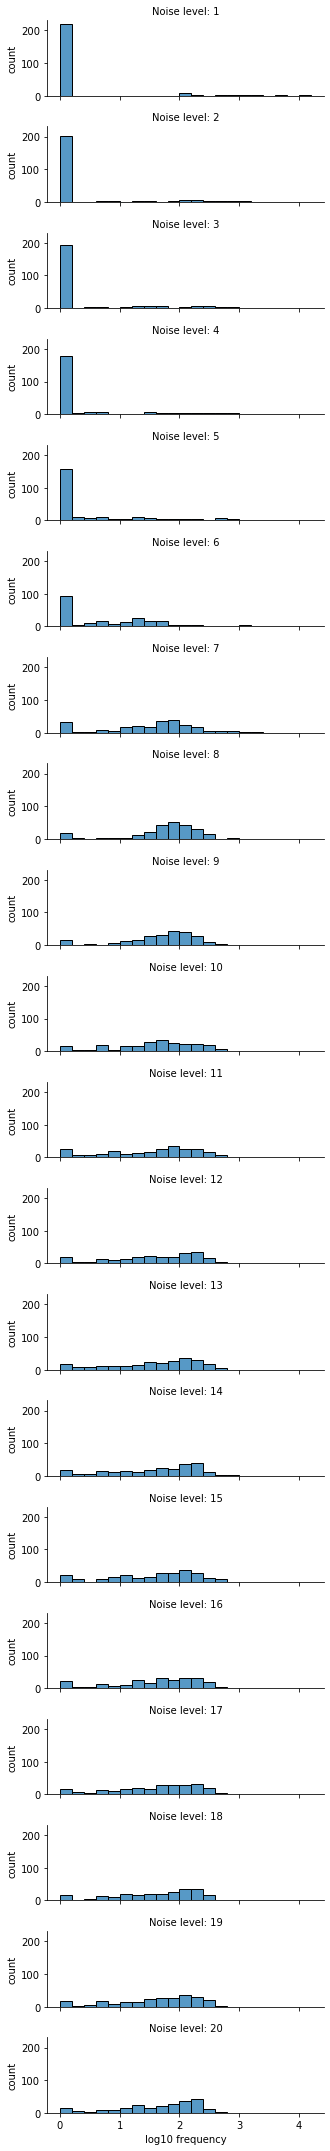

In [167]:
f = sns.FacetGrid(data=counted_last, 
                  col='noise_level_recoded', col_wrap=1,
                  height=1.5, aspect=3)
f.map(sns.histplot, 'log_frequency', binwidth=.2)
for idx, a in enumerate(f.axes):
    if idx >= 15:
        a.set_xlabel(f'log10 frequency')
    a.set_ylabel('count')
f.set_titles('Noise level: {col_name}')
plt.show()

### Visualize some trials in vector space

In [68]:
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
reducer = umap.UMAP(n_neighbors=5, min_dist=0.1)

In [ ]:
for bidx, b in enumerate(sorted(pair_aggs['noise_level_recoded'].unique().tolist())):
    
    # Sample some trials
    data = pair_aggs[(pair_aggs['noise_level_recoded']==b) & (pair_aggs['amount_gain']==0)]
    if data.shape[0] > 0:
        data = data.sample(n=2).sort_values('amount_gain')
        pairs_sampled = data.pair.tolist()
        pairs_sampled_agent = data.best_agent.tolist()
        pairs_sampled_seed = data.init_seed.tolist()
        pairs_sampled_gain = data.amount_gain.tolist()
        ps = list(zip(pairs_sampled, pairs_sampled_agent, 
                       pairs_sampled_seed, pairs_sampled_gain))

        for idx, (pair, agent, seed, gain) in enumerate(ps):
            # Get reference space
            space = pd.read_csv(f'{models_path}/{date}/noised_vectors/{agent}.tsv', sep='\t', index_col=0)
            animal_dict = dict(zip(space.index, 
                               range(len(space.index))))
            scaled_space = StandardScaler().fit_transform(space)
            embedding = reducer.fit_transform(scaled_space)

            # Read in files and extract named animals
            idf = pd.read_csv(f'{log_path}/{date}/individual/{agent}_1_0.01179.txt')
            idf = idf[idf['init_seed']==seed]
            pdf = pd.read_csv(f'{log_path}/{date}/pairs/{pair}_2_0.01179.txt')
            pdf = pdf[pdf['init_seed']==seed]

            named_individual = idf.seed.tolist() + [idf.response.tolist()[-1]]
            named_idx_individual = [animal_dict[i] for i in named_individual]
            xs_individual = [embedding[n,0] for n in named_idx_individual]
            ys_individual = [embedding[n,1] for n in named_idx_individual]

            named_pair = pdf.seed.tolist() + [pdf.response.tolist()[-1]]
            named_idx_pair = [animal_dict[i] for i in named_pair]
            xs_pair = [embedding[n,0] for n in named_idx_pair]
            ys_pair = [embedding[n,1] for n in named_idx_pair]

            # Plot trial
            f, ax = plt.subplots(figsize=(35,20))
            plt.scatter(embedding[:,0], embedding[:,1], color='grey')
            for idx, e in enumerate(embedding):
                if space.index[idx] == seed:
                    plt.annotate(f'start: {space.index[idx]}', e, fontsize=20, 
                                 weight='bold')
                elif space.index[idx] == named_individual[-1]:
                    plt.annotate(f'{space.index[idx]}: end', e+0.03, fontsize=20, 
                                 weight='bold', color='darkblue')
                elif space.index[idx] == named_pair[-1]:
                    plt.annotate(f'{space.index[idx]}: end', e+0.03, fontsize=20, 
                                 weight='bold', color='darkorange')
                else:
                    plt.annotate(space.index[idx], e, fontsize=14)
            for idx in range(len(xs_individual)-1):
                plt.arrow(x=xs_individual[idx], 
                          y=ys_individual[idx], 
                          dx=xs_individual[idx+1]-xs_individual[idx],
                          dy=ys_individual[idx+1]-ys_individual[idx],
                          shape='full', lw=2,
                          length_includes_head=True, head_width=.05, 
                          color='darkblue')
            for idx in range(len(xs_pair)-1):
                plt.arrow(x=xs_pair[idx], 
                          y=ys_pair[idx], 
                          dx=xs_pair[idx+1]-xs_pair[idx],
                          dy=ys_pair[idx+1]-ys_pair[idx],
                          shape='full', 
                          lw=1,
                          length_includes_head=True, 
                          head_width=.05, 
                          color='darkorange')

            plt.title(f'Noise level {b}, gain: {gain}', 
                      fontsize=20, weight='bold')
            plt.show()